# Graph Results

## NPIs

- More stuff to ask about the npis, but its to late to think about it
- Run once with no dampings and plot it
- Think more about the dynamic damping plot and also write set_npis for dynamic!!!!!!!!!!!!!!!!!!!!!!!!!

- Goal: Open
- Start at day N = 60 of carlotta and go on after that 
- Daten aus der Simulation für carlotta in anderer Farbe und dann fortlaufend Kurve simulieren
- Maybe Landkreise hinzufügen in grau https://www.sciencedirect.com/science/article/pii/S0025556421001371

- For dynamic maybe at 50 and 100 

In [1]:
import h5py
from memilio.simulation.osecir import InfectionState
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
infection_state_names = []
for name, value in InfectionState.__members__.items():
    infection_state_names.append(f"{name}")
print( infection_state_names)

['Susceptible', 'Exposed', 'InfectedNoSymptoms', 'InfectedNoSymptomsConfirmed', 'InfectedSymptoms', 'InfectedSymptomsConfirmed', 'InfectedSevere', 'InfectedCritical', 'Recovered', 'Dead']


In [3]:
h5file = h5py.File("results/result_open.h5", 'r')

In [4]:
time_array = np.array(h5file['1001']["Time"])

In [5]:
list(h5file['1001'])

['Group1', 'Time', 'Total']

In [6]:
def preprocess_data(filepath):
    h5file = h5py.File(filepath, 'r')
    # time_array = np.array(h5file['1001']["Time"])

    region_names = list(h5file.keys())

    # Get shape info from first region
    first_region = h5file[region_names[0]]
    time = first_region["Time"][:]                   # 1D (n_time,)
    data_shape = first_region["Total"].shape         # (n_time, n_state)

    # Initialize accumulator
    total_sum = np.zeros(data_shape, dtype=np.float64)

    # --- Vectorized accumulation across all regions ---
    for region in region_names:
        region_data = h5file[region]["Total"][:]  # or ["group_1"]
        total_sum += region_data
    
    # --- Convert to DataFrame ---

    df = pd.DataFrame(total_sum, index=time, columns=infection_state_names)
    df.index.name = "time"

    return df

### General parameters

In [7]:
df_inference = preprocess_data("../../../data/results_run0.h5")
df_inference

,Susceptible,Exposed,InfectedNoSymptoms,InfectedNoSymptomsConfirmed,InfectedSymptoms,InfectedSymptomsConfirmed,InfectedSevere,InfectedCritical,Recovered,Dead
time,,,,,,,,,,
0.0,8.317220e+07,50077.402966,10306.837498,0.0,51336.071429,0.0,5318.520123,374.571429,2.779793e+05,9542.285714
1.0,8.315430e+07,54921.576187,13417.560101,0.0,52797.555516,0.0,5426.466381,384.990317,2.863513e+05,9542.971166
2.0,8.313231e+07,62282.279026,15859.941167,0.0,55620.184852,0.0,5550.590609,395.490472,2.955735e+05,9543.675482
3.0,8.310661e+07,71308.946343,18339.627245,0.0,59524.532761,0.0,5703.743862,406.206081,3.057042e+05,9544.398918
4.0,8.307689e+07,81897.207066,21103.161373,0.0,64501.043095,0.0,5896.067201,417.330792,3.168917e+05,9545.142031
...,...,...,...,...,...,...,...,...,...,...
56.0,7.997061e+07,249549.965404,73838.622101,0.0,376145.396650,0.0,44313.159924,3918.079820,2.849028e+06,9740.335819
57.0,7.990336e+07,253834.857350,74968.866259,0.0,379197.775445,0.0,44539.070093,3956.170469,2.907541e+06,9747.441981
58.0,7.983450e+07,258593.107007,76235.270298,0.0,382611.740523,0.0,44782.116705,3993.441423,2.966671e+06,9754.616128


In [8]:
damping_day = 7
change_day = 60
state = "InfectedSymptoms"

### Scenario 1: Open the gates

In [9]:
df = preprocess_data("results/result_open.h5")

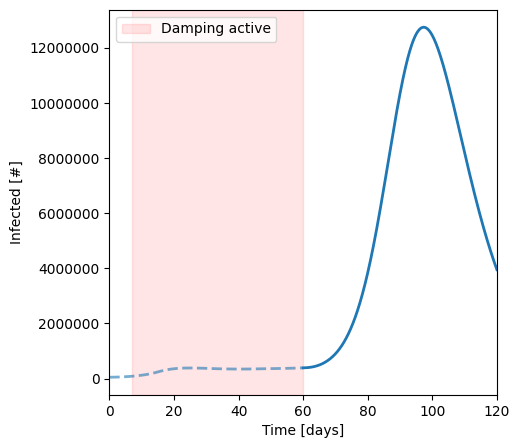

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot first 60 days with dotted line
df_inference[state].plot(ax=ax, lw=2, alpha=0.6, color='tab:blue', linestyle="--", label='_nolegend_')

# Plot the rest normally
ax.plot(df[state].index + change_day, df[state].values, lw=2, color='tab:blue', alpha=1.0, label='_nolegend_')

#df["InfectedNoSymptoms"].plot(ax=ax, lw=2, label="InfectedNoSymptoms")

plt.xlabel("Time [days]")
plt.ylabel("Infected [#]")
plt.grid(False)

# plt.axvline(damping_day, color="red", linestyle="--", lw=2)
# plt.annotate("Damping introduced",
#              xy=(damping_day, df[state].max()*0.8),
#              xytext=(damping_day+1, df[state].max()*0.85),
#              arrowprops=dict(arrowstyle="->", color="red"),
#              color="red")

# plt.axvline(change_day, color="gray", linestyle="--", lw=2)

plt.axvspan(damping_day, df_inference.index.max(), color="red", alpha=0.1, label="Damping active")
# plt.axvspan(change_day, df.index.max(), color="red", alpha=0.2)
ax.set_xlim(0, 120)
ax.ticklabel_format(style='plain', axis='y')

plt.legend(loc='upper left')
plt.show()

### Scenario 2: Halt Stop, das bleibt alles so wies ist

In [35]:
df = preprocess_data("results/result_same.h5")

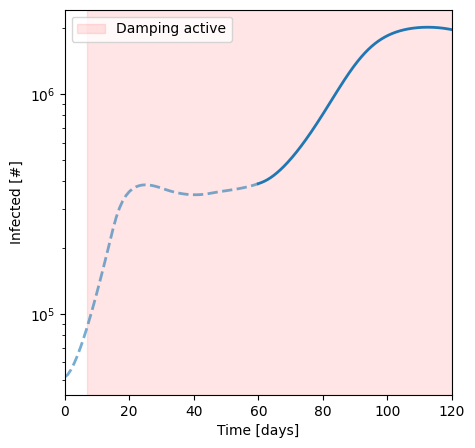

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot first 60 days with dotted line
df_inference[state].plot(ax=ax, lw=2, alpha=0.6, color='tab:blue', linestyle="--", label='_nolegend_')

# Plot the rest normally
ax.plot(df[state].index + change_day, df[state].values, lw=2, color='tab:blue', alpha=1.0, label='_nolegend_')

# Optional: style
plt.xlabel("Time [days]")
plt.ylabel("Infected [#]")
plt.grid(False)
plt.yscale('log')

plt.axvspan(damping_day, df.index.max() + change_day, color="red", alpha=0.1, label="Damping active")

ax.set_xlim(0, 120)
# ax.set_ylim(bottom=None, top=df[state].max()*1.05)
plt.legend(loc='upper left')
plt.show()

### Scenario 3: You shall not ... leave your house

In [13]:
df = preprocess_data("results/result_lockdown.h5")

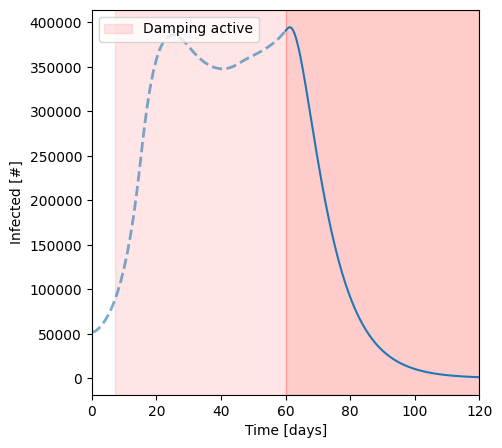

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot first 60 days with dotted line
df_inference[state].plot(ax=ax, lw=2, alpha=0.6, color='tab:blue', linestyle="--", label='_nolegend_')

# Plot the rest normally
ax.plot(df[state].index + change_day, df[state].values, color='tab:blue', alpha=1.0, label='_nolegend_')

# Optional: style
plt.xlabel("Time [days]")
plt.ylabel("Infected [#]")
plt.grid(False)

plt.axvspan(damping_day, df.index.max(), color="red", alpha=0.1, label="Damping active")
plt.axvspan(change_day, df.index.max() + change_day, color="red", alpha=0.2, label="_nolegend_")

ax.set_xlim(0, 120)
# ax.set_ylim(bottom=None, top=df[state].max()*1.05)
plt.legend(loc='upper left')
plt.show()

### Scenario 4: ...denn ich bin flexible

In [15]:
df = preprocess_data("results/result_dynamic.h5")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'results/result_dynamic.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

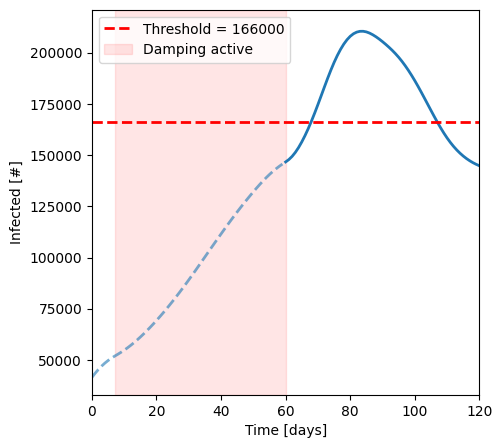

In [ ]:
threshold = 200 * 830   # your threshold value

fig, ax = plt.subplots(figsize=(5, 5))

# Plot first 60 days with dotted line
df_inference[state].plot(ax=ax, lw=2, alpha=0.6, color='tab:blue', linestyle="--", label='_nolegend_')

# Plot the rest normally
ax.plot(df[state].index + change_day, df[state].values, lw=2, color='tab:blue', alpha=1.0, label='_nolegend_')

# Add horizontal threshold line
ax.axhline(y=threshold, color='red', linestyle='--', lw=2, label=f"Threshold = {threshold}")

# ax.fill_between(
#     df.index,
#     threshold,                 # start shading at threshold
#     df[state].max()*1.05,      # end slightly above max for clarity
#     color='red',
#     alpha=0.1
# )

plt.axvspan(damping_day, change_day, color="red", alpha=0.1, label="Damping active")

# Optional: style
ax.set_xlabel("Time [days]")
plt.ylabel("Infected [#]")
plt.grid(False)

ax.legend(loc='upper left')
ax.set_xlim(0, 120)
ax.set_ylim(bottom=None, top=df[state].max()*1.05)
plt.show()